**7)Aim: Implement and demonstrate the working model of K-means clustering algorithm with Expectation Maximization Concept. Program: Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Python ML library classes/API in the program.**

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')
Number of columns: 5
The Adjusted Rand Index of K-Means:  0.6150051194844962
The Silhouette Score of K-Means:  0.45655541185952575


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The Adjusted Rand Index of GMM:  0.9025775147114491
The Silhouette Score of GMM:  0.37020510233493803


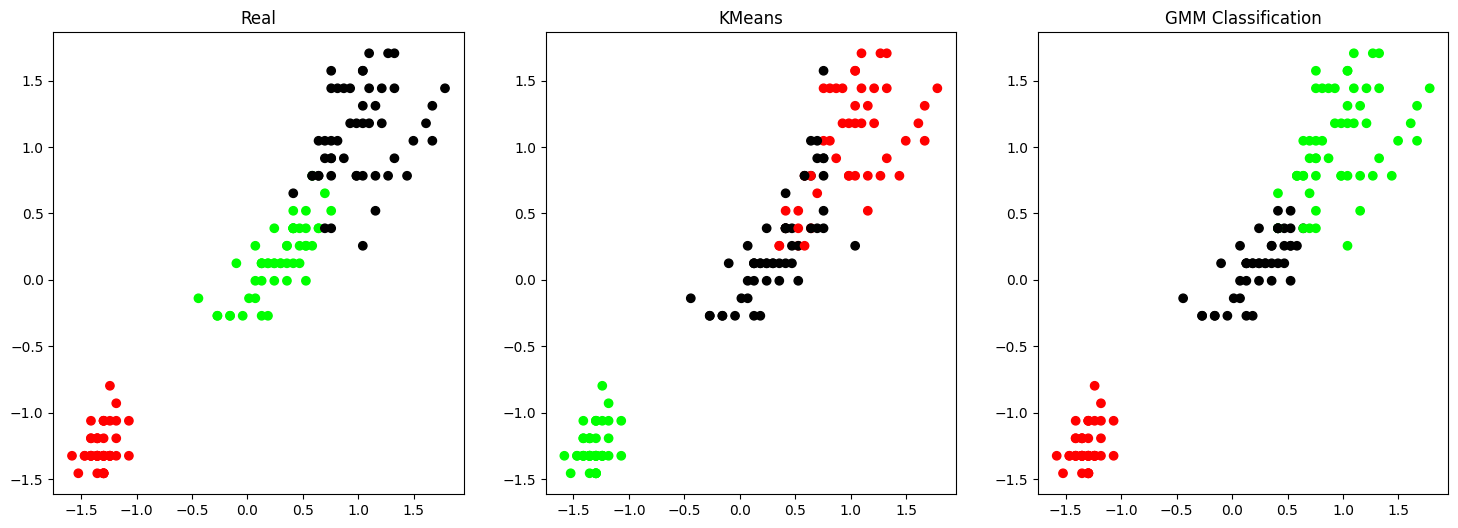

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the dataset
csv_path = "/kaggle/input/iris2-csv/iris 2.csv"
dataset = pd.read_csv(csv_path)

# Inspect columns
print(dataset.head())
print(dataset.columns)
print(f"Number of columns: {len(dataset.columns)}")

# Update column names based on inspection
# Ensure the number of names matches the number of columns in the dataset
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataset.columns = names

# Prepare features and labels
X = dataset.iloc[:, :-1]  # Features
y = dataset['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})  # Labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(18, 6))

# REAL PLOT
plt.subplot(1, 3, 1)
plt.title('Real')
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=colormap[y])

# K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
y_kmeans = kmeans_model.labels_
plt.subplot(1, 3, 2)
plt.title('KMeans')
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=colormap[y_kmeans])
print('The Adjusted Rand Index of K-Means: ', adjusted_rand_score(y, y_kmeans))
print('The Silhouette Score of K-Means: ', silhouette_score(X_scaled, y_kmeans))

# Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=3, random_state=0).fit(X_scaled)
y_gmm = gmm_model.predict(X_scaled)
plt.subplot(1, 3, 3)
plt.title('GMM Classification')
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=colormap[y_gmm])
print('The Adjusted Rand Index of GMM: ', adjusted_rand_score(y, y_gmm))
print('The Silhouette Score of GMM: ', silhouette_score(X_scaled, y_gmm))

plt.show()
